# Distribución normal y gaussiana

Utilizando un cuaderno de Jupyter Notebook y el lenguaje de programación Python, realiza las siguientes operaciones:

- Importa a tu espacio de trabajo el siguiente dataset: https://www.kaggle.com/elikplim/forest-fires-data-set
- Crea un arreglo que contenga los valores de la columna etiquetada por: #temp.
- Construye el histograma referente al arreglo creado en el punto anterior.
- Evalúa si la gráfica obtenida tiene semejanzas con la distribución normal y obtén la media, la mediana y la desviación estándar de los datos
- Dibuja la gráfica de la distribución gaussiana inferida por los datos, en caso de que corresponda, y evalúa la suposición realizada en el punto anterior.


## Importación de librerías y dataset

In [7]:
import pandas as pd

# Se carga el dataset desde el ambiente local que ya se importó desde Kaggle
df = pd.read_csv('assets/forestfires.csv')
if( df is None):
    print("Error al cargar el dataset")
else:
    print("Dataset cargado exitosamente!! ")
    print("Número de filas y columnas: ", df.shape)
    print("Primeras 10 filas del dataset:")
    print(df.head(10))


Dataset cargado exitosamente!! 
Número de filas y columnas:  (517, 13)
Primeras 10 filas del dataset:
   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


## Creación de arreglo que contenga los valores de la columna etiquetada por: #temp.

In [11]:
import numpy as np
# Se crea el arreglo con los valores de la columna 'temp'
temp_array = df['temp'].values

print(f'El arreglo tiene {temp_array.shape[0]} elementos')
print(f"El tamaño del arreglo es : {len(temp_array)} elementos")
print(f'Los primeros 5 elementos del arreglo son: {temp_array[:5]}')
print(f'Tipo de datos: {type(temp_array)}')

El arreglo tiene 517 elementos
El tamaño del arreglo es : 517 elementos
Los primeros 5 elementos del arreglo son: [ 8.2 18.  14.6  8.3 11.4]
Tipo de datos: <class 'numpy.ndarray'>


## Histograma del arreglo

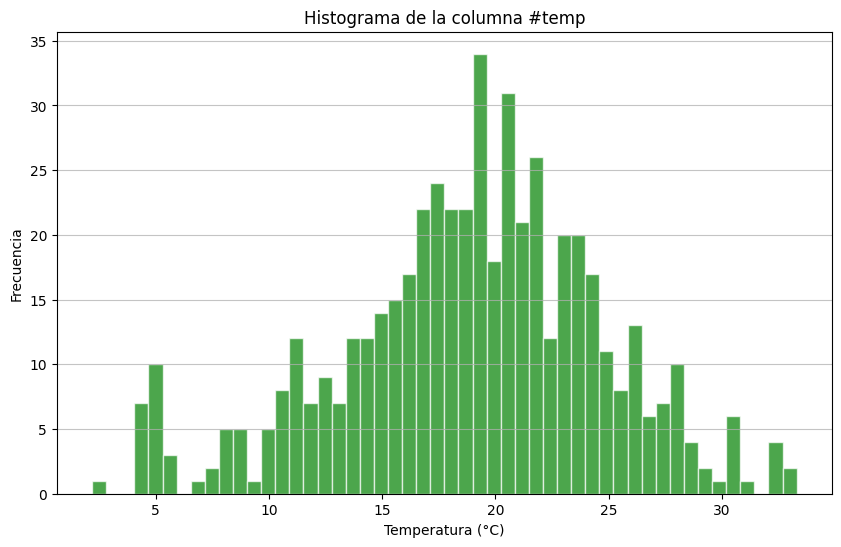

Número total de observaciones: 517
Temperatura mínima: 2.20°C
Temperatura máxima: 33.30°C


In [21]:
import matplotlib.pyplot as plt

# Se crea el histograma
plt.figure(figsize=(10, 6))
# Se crea el histograma con 50 bins
plt.hist(temp_array, bins=50, alpha=0.7, color='green', edgecolor='white')
plt.title('Histograma de la columna #temp')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Se muestran las estadísticas básicas
print(f"Número total de elementos: {len(temp_array)}")
print(f"Temperatura mínima: {np.min(temp_array):.2f}°C")
print(f"Temperatura máxima: {np.max(temp_array):.2f}°C")


## Evaluación de la gráfica obtenida y cálculo de media, mediana y desviación estándar

=== ESTADÍSTICAS DESCRIPTIVAS ===
Media: 18.89°C
Mediana: 19.30°C
Desviación estándar: 5.80°C
Varianza: 33.65
Diferencia media-mediana: 0.41°C


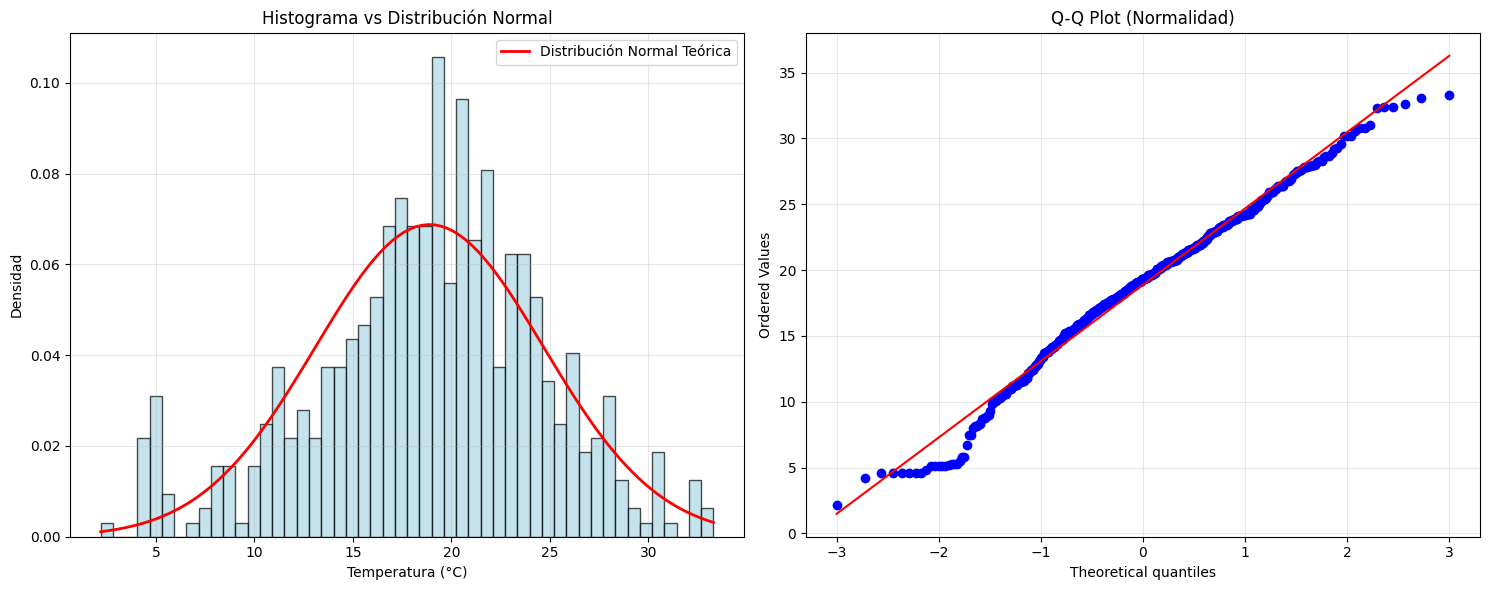


=== ANÁLISIS DE NORMALIDAD ===
Coeficiente de asimetría (skewness): -0.330
Coeficiente de curtosis: 0.123

Test de Shapiro-Wilk:
Estadístico: 0.9868, p-valor: 0.000126

=== ANÁLISIS EXPLICADO ===
La media y mediana son muy similares, lo que quiere decir que existe simetría en los datos.
La distribución presenta poca asimetría (cercana a la normal).
El test de Shapiro-Wilk rechaza la hipótesis de normalidad.


In [25]:
# Se calculan las estadísticas
media = np.mean(temp_array)
mediana = np.median(temp_array)
desv_std = np.std(temp_array)
varianza = np.var(temp_array)

# Aqui se muestran las estadísticas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"Media: {media:.2f}°C")
print(f"Mediana: {mediana:.2f}°C")
print(f"Desviación estándar: {desv_std:.2f}°C")
print(f"Varianza: {varianza:.2f}")
print(f"Diferencia media-mediana: {abs(media - mediana):.2f}°C")

# Se evalua normalidad visualmente
from scipy import stats

# Se crean los subplots para comparar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma con curva normal superpuesta
ax1.hist(temp_array, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x = np.linspace(temp_array.min(), temp_array.max(), 100)
curva_normal = stats.norm.pdf(x, media, desv_std)
ax1.plot(x, curva_normal, 'r-', linewidth=2, label='Distribución Normal Teórica')
ax1.set_title('Histograma vs Distribución Normal')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Q-Q plot para evaluar normalidad
stats.probplot(temp_array, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot (Normalidad)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis
print("\n=== ANÁLISIS DE NORMALIDAD ===")
print(f"Coeficiente de asimetría (skewness): {stats.skew(temp_array):.3f}")
print(f"Coeficiente de curtosis: {stats.kurtosis(temp_array):.3f}")

# Test de normalidad
shapiro_stat, shapiro_p = stats.shapiro(temp_array[:5000])  # Shapiro-Wilk (máximo 5000 muestras)
print(f"\nTest de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_stat:.4f}, p-valor: {shapiro_p:.6f}")

print("\n=== ANÁLISIS EXPLICADO ===")
if abs(media - mediana) < 1:
    print("La media y mediana son muy similares, lo que quiere decir que existe simetría en los datos.")
else:
    print("Existe diferencia notable entre media y mediana, por que que indican que no existe simetría.")

if abs(stats.skew(temp_array)) < 0.5:
    print("La distribución presenta poca asimetría (cercana a la normal).")
elif stats.skew(temp_array) > 0:
    print("La distribución tiene sesgo positivo (cola hacia la derecha).")
else:
    print("La distribución tiene sesgo negativo (cola hacia la izquierda).")

if shapiro_p > 0.05:
    print("El test de Shapiro-Wilk sugiere que los datos siguen una distribución normal.")
else:
    print("El test de Shapiro-Wilk rechaza la hipótesis de normalidad.")

## Gráfica de distribución gaussiana

<Figure size 1200x800 with 0 Axes>

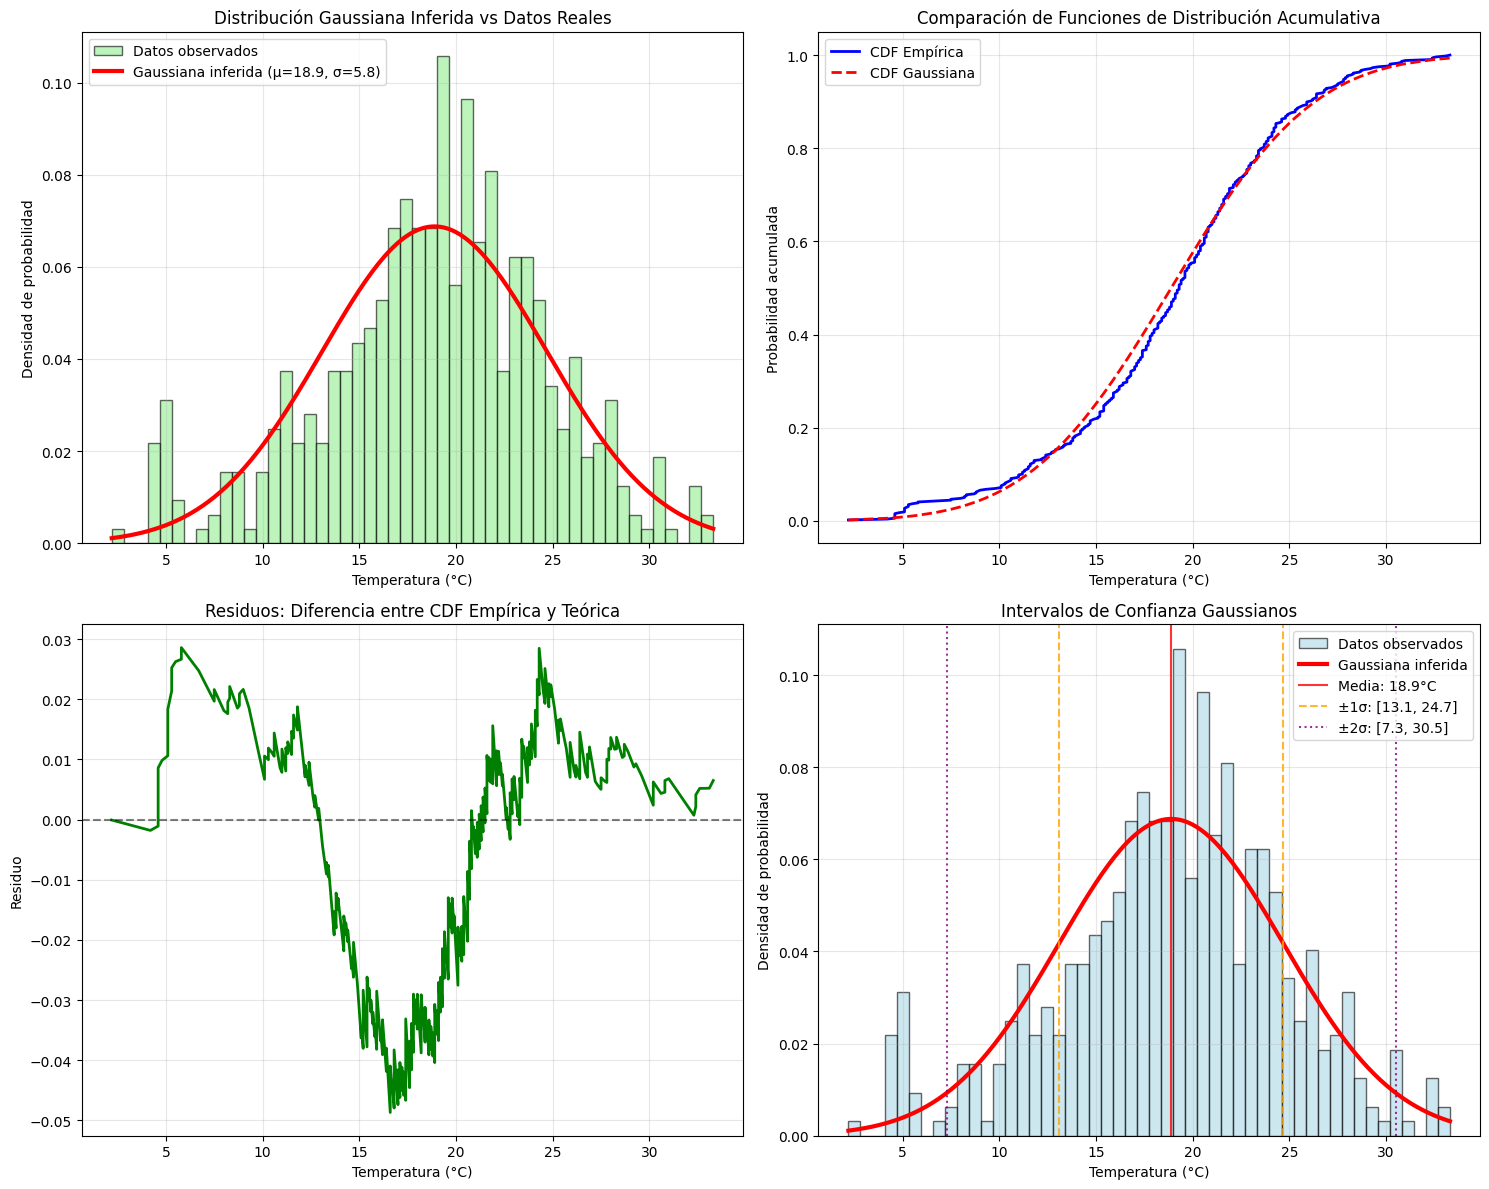

=== EVALUACIÓN DE LA SUPOSICIÓN GAUSSIANA ===

Test de Kolmogorov-Smirnov:
Estadístico: 0.0506, p-valor: 0.136511

Comparación con regla 68-95-99.7:
Datos dentro de ±1σ: 71.0% (esperado: 68.3%)
Datos dentro de ±2σ: 93.8% (esperado: 95.4%)
Datos dentro de ±3σ: 100.0% (esperado: 99.7%)

********* CONCLUSIÓN FINAL *********
Los tests estadísticos rechazan la hipótesis de normalidad.
A pesar de que la forma es similar a una gaussiana, no es perfectamente normal.

Recomendación: Considerar transformaciones o métodos no paramétricos


In [30]:
# Se crea la gráfica de la distribución gaussiana inferida
plt.figure(figsize=(12, 8))

# se crean los subplots para análisis completo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma con distribución gaussiana inferida

ax1.hist(temp_array, bins=50, density=True, alpha=0.6, color='lightgreen',
         edgecolor='black', label='Datos observados')
x_range = np.linspace(temp_array.min(), temp_array.max(), 200)
gaussian_inferida = stats.norm.pdf(x_range, media, desv_std)
ax1.plot(x_range, gaussian_inferida, 'r-', linewidth=3,
         label=f'Gaussiana inferida (μ={media:.1f}, σ={desv_std:.1f})')
ax1.set_title('Distribución Gaussiana Inferida vs Datos Reales')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Densidad de probabilidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Función de distribución acumulativa (CDF)
temp_sorted = np.sort(temp_array)
cdf_empirica = np.arange(1, len(temp_sorted) + 1) / len(temp_sorted)
cdf_teorica = stats.norm.cdf(temp_sorted, media, desv_std)
ax2.plot(temp_sorted, cdf_empirica, 'b-', linewidth=2, label='CDF Empírica')
ax2.plot(temp_sorted, cdf_teorica, 'r--', linewidth=2, label='CDF Gaussiana')
ax2.set_title('Comparación de Funciones de Distribución Acumulativa')
ax2.set_xlabel('Temperatura (°C)')
ax2.set_ylabel('Probabilidad acumulada')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Residuos (diferencias entre observado y teórico)
residuos = cdf_empirica - cdf_teorica
ax3.plot(temp_sorted, residuos, 'g-', linewidth=2)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_title('Residuos: Diferencia entre CDF Empírica y Teórica')
ax3.set_xlabel('Temperatura (°C)')
ax3.set_ylabel('Residuo')
ax3.grid(True, alpha=0.3)

# 4. Intervalos de confianza gaussianos
ax4.hist(temp_array, bins=50, density=True, alpha=0.6, color='lightblue',
         edgecolor='black', label='Datos observados')
ax4.plot(x_range, gaussian_inferida, 'r-', linewidth=3, label='Gaussiana inferida')

# Se agregan las líneas para intervalos de confianza
ax4.axvline(media, color='red', linestyle='-', alpha=0.8, label=f'Media: {media:.1f}°C')
ax4.axvline(media - desv_std, color='orange', linestyle='--', alpha=0.8, label=f'±1σ: [{media-desv_std:.1f}, {media+desv_std:.1f}]')
ax4.axvline(media + desv_std, color='orange', linestyle='--', alpha=0.8)
ax4.axvline(media - 2*desv_std, color='purple', linestyle=':', alpha=0.8, label=f'±2σ: [{media-2*desv_std:.1f}, {media+2*desv_std:.1f}]')
ax4.axvline(media + 2*desv_std, color='purple', linestyle=':', alpha=0.8)

ax4.set_title('Intervalos de Confianza Gaussianos')
ax4.set_xlabel('Temperatura (°C)')
ax4.set_ylabel('Densidad de probabilidad')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluación cuantitativa de la suposición gaussiana
print("=== EVALUACIÓN DE LA SUPOSICIÓN GAUSSIANA ===")

# Test de Kolmogorov-Smirnov
ks_stat, ks_p = stats.kstest(temp_array, lambda x: stats.norm.cdf(x, media, desv_std))
print(f"\nTest de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_stat:.4f}, p-valor: {ks_p:.6f}")

# Calcular porcentajes en intervalos gaussianos
pct_1sigma = np.sum((temp_array >= media - desv_std) & (temp_array <= media + desv_std)) / len(temp_array) * 100
pct_2sigma = np.sum((temp_array >= media - 2*desv_std) & (temp_array <= media + 2*desv_std)) / len(temp_array) * 100
pct_3sigma = np.sum((temp_array >= media - 3*desv_std) & (temp_array <= media + 3*desv_std)) / len(temp_array) * 100

print(f"\nComparación con regla 68-95-99.7:")
print(f"Datos dentro de ±1σ: {pct_1sigma:.1f}% (esperado: 68.3%)")
print(f"Datos dentro de ±2σ: {pct_2sigma:.1f}% (esperado: 95.4%)")
print(f"Datos dentro de ±3σ: {pct_3sigma:.1f}% (esperado: 99.7%)")

# Conclusión final
print(f"\n********* CONCLUSIÓN FINAL *********")
if shapiro_p > 0.05 and ks_p > 0.05 and abs(pct_1sigma - 68.3) < 5:
    print("Los datos se ajustan bien a una distribución gaussiana.")
    print("La suposición de normalidad es válida para este dataset.")
elif shapiro_p <= 0.05 or ks_p <= 0.05:
    print("Los tests estadísticos rechazan la hipótesis de normalidad.")
    print("A pesar de que la forma es similar a una gaussiana, no es perfectamente normal.")
else:
    print(" Los datos no siguen una distribución gaussiana.")
    print(" La suposición de normalidad no es válida para este dataset.")

print(f"\nRecomendación: {'Usar métodos paramétricos' if shapiro_p > 0.05 else 'Considerar transformaciones o métodos no paramétricos'}")